### Cross-Cohort Music Recommendation-Clustering




### 1) Set up your predictors

  

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# TODO: import your selected model and its evaluation metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# TODO: load in dataset
songs = pd.read_csv('../data/music_embeds.csv')

# TODO: select your predictor columns
data = songs.drop(columns=['filename','song','genre'],axis = 1)
data.head()

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,...,dim_758,dim_759,dim_760,dim_761,dim_762,dim_763,dim_764,dim_765,dim_766,dim_767
0,-0.004854,-0.014205,-0.004760,-0.006950,0.000537,0.001243,-0.013726,0.000464,-0.006346,0.005474,...,-0.013677,-0.067677,-0.003038,-0.008058,-0.006683,-0.001391,-0.011345,-0.002085,-0.004069,-0.017774
1,-0.009634,-0.014021,-0.001026,-0.005184,-0.000343,0.000106,0.001932,-0.003759,-0.008788,0.000868,...,0.016843,0.051512,-0.007019,-0.006988,-0.013948,-0.000976,-0.013896,-0.012256,0.008407,-0.011757
2,0.001255,-0.017850,-0.013220,-0.004844,-0.004731,-0.008914,0.005198,-0.000873,-0.010008,-0.006639,...,0.005032,-0.011055,0.000567,-0.015456,-0.005778,-0.003446,-0.016408,-0.015601,0.005135,-0.005079
3,-0.005455,-0.010048,-0.012848,0.015155,0.006223,0.003988,-0.007696,-0.000192,0.002167,-0.003131,...,-0.012346,-0.020413,-0.005628,-0.020266,-0.005505,-0.007672,-0.020972,-0.005813,-0.000709,-0.005729
4,-0.003881,-0.003831,-0.004683,-0.017928,0.001103,0.005035,0.002506,-0.005794,-0.015744,0.005363,...,-0.006812,0.014917,-0.003443,0.002318,-0.010466,-0.018116,-0.008590,-0.010983,-0.009556,-0.004235


In [ ]:
# X data
X= data

### 2) Search for best clusters

Use tools the elbow method or silhouette score to find the best clusters for your model.

## ELBOW METHOD

In [4]:
inertias = []
ks  = range(1,10)
for k in ks:
    kmeans = KMeans(n_clusters=k).fit(X)
    inertias.append(kmeans.inertia_)
    print('K:',k,'inertia:',kmeans.inertia_)

K: 1 inertia: 10.970902471359453
K: 2 inertia: 8.719662741675606
K: 3 inertia: 8.031111456218031
K: 4 inertia: 7.77833623320163
K: 5 inertia: 7.017393046427808
K: 6 inertia: 7.119299994880332
K: 7 inertia: 6.440663862415999
K: 8 inertia: 6.125622887851053
K: 9 inertia: 6.136299367017234


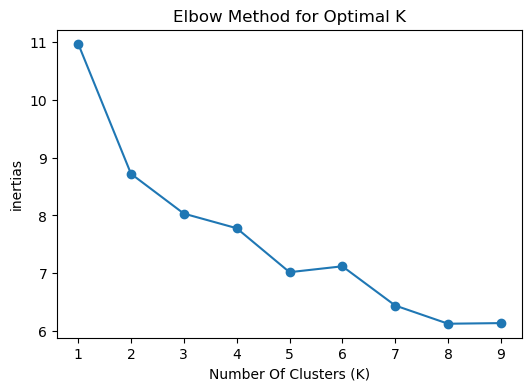

In [5]:
plt.figure(figsize=(6,4))
plt.plot(list(ks),inertias,marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel("Number Of Clusters (K)")
plt.ylabel('inertias')
plt.show()

## Silhouette Method 

K: 2 Silhouette: 0.17156886254004797
K: 3 Silhouette: 0.13263052867888975
K: 4 Silhouette: 0.10253288093107867
K: 5 Silhouette: 0.07515577470099859
K: 6 Silhouette: 0.0745844546419022
K: 7 Silhouette: 0.06839120113362193
K: 8 Silhouette: 0.05605296249354533
K: 9 Silhouette: 0.04263665141172672


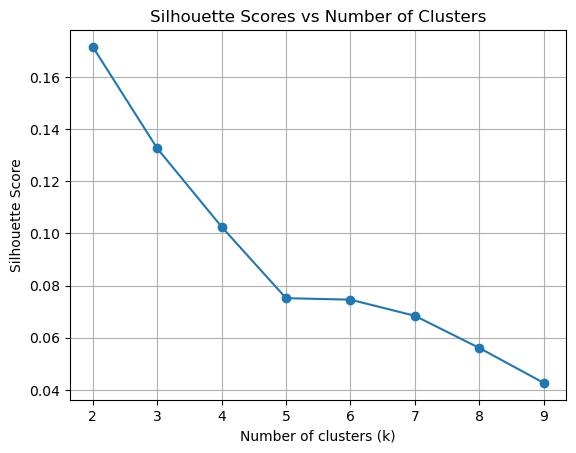

In [6]:
silhouette_scores = []
ks = range(2, 10)

for k in ks:
    kmeans = KMeans(n_clusters=k).fit(X)

    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

    print('K:', k, 'Silhouette:', score)

plt.plot(ks, silhouette_scores, marker='o')
plt.title('Silhouette Scores vs Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

 Both methods point to k = 2 as the best choice. I selected 4 clusters as it also provides a good fit for the data.

### 3) Train your model

Select the model with best cluster number and generate predictions on your test set. Evaluate how "well" your model clustered songs by evaluating the songs that exist in the same cluster assignments. 

In [9]:
kmeans_music = KMeans(n_clusters=4)
kmeans_music.fit(X)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [10]:
# predict your labels on your predictors and assign it to a new column
labels = kmeans_music.predict(X)
songs["labels"] = labels

# view your cluster assignments
labeled_music = songs[["filename", "genre", "labels"]]
labeled_music.head()

,filename,genre,labels
0,A Fan's Mail,funk,2
1,Abracadabra,pop,1
2,Aguas De Marco,bossa nova,3
3,Another Time,hip hop,2
4,Belong to the World,hip hop,1


In [11]:
# view the songs that fall into specific clusters, what sort of insight do you think was captured here?
labeled_music[labeled_music["labels"] == 4]

,filename,genre,labels


There is no need for Cluster 4, as it contains no data. I think we only need a maximum of 2 or 3 clusters.

Serialize your model and run it in your dashboard via `streamlit run recommender.py`

In [12]:
# serialize your model
import joblib

joblib.dump(kmeans_music, "../kmeans_model.pkl")

['../kmeans_model.pkl']